In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
from matplotlib import cm
from tqdm import tqdm
import json

import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc
import squidpy as sq
from scipy.spatial import KDTree
import networkx as nx


from src.slide_utilities import *

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read metadata: resolution_dict
with open("res_indices.json", 'r') as file:
    resolution_dict = json.load(file)
sample_set = resolution_dict.keys()

In [3]:
sample_set

dict_keys(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '60', '61', '62', '63'])

In [4]:
# adata = sc.read_h5ad("/data/projects/Behnam/xenium-cgn/data/Glom_NichePCA_Ann_all_with_clusters_6.h5ad")

adata = sc.read_h5ad("/projectbig/jupyternotebook/xenium_cgn/results_behnam/adata_repo/data_glom_ann_cell_type_v1.h5ad")

# adata = sc.read_h5ad("/data/projects/zeba/MY_PROJECTS/240130_Xenium_ANCA_SLE_GBM/notebooks/test_Plotting_Spatial_GeneExpression_Behnam/OUTPUT_Merged/GNN_gdTcells.h5ad")



In [5]:
adata.obs

,x,y,z,cluster,n_transcripts,density,elongation,area,avg_confidence,avg_assignment_confidence,...,Sample_num,Slide_ID,celltype_l1,celltype_l1_codes,celltype_l1_proba,batch,nichepca_ann,nichepca_glom_no,nichepca_clusters,celltype_subsets
cell_CRc5a3721c5-120227_0011546,803.870719,11498.202211,33.280027,2,97,1.9400,1.440,49.99,0.9958,0.9208,...,X12,0011546,PT,16,0.999998,0,Other,Other,0,PT
cell_CR85333614e-227363_0011284,8724.220426,11977.446623,14.472116,4,61,1.2450,2.867,48.98,0.9972,0.8974,...,X45,0011284,PT,16,0.986086,0,Other,Other,0,PT
cell_CRe9244f5f0-274454_0018775,8973.079108,14275.671531,24.239919,2,162,1.3410,1.680,120.80,0.9969,0.9304,...,X58,0018775,FIB,6,1.000000,0,Other,Other,0,FIB
cell_CRd921aadf4-7960_0011216,1191.310236,2876.255111,26.555307,1,148,1.9930,2.372,74.27,0.9977,0.9208,...,X24,0011216,DCT,3,0.999900,0,Other,Other,0,DCT
cell_CR85333614e-19040_0011284,4409.576613,2192.965546,21.390232,1,245,1.6660,5.800,147.10,0.9971,0.9547,...,X48,0011284,TAL,19,0.983883,0,Other,Other,0,TAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cell_CRb53fa7cc5-166196_0011762,10480.348509,12491.422181,17.307450,1,116,0.7384,1.877,157.10,0.9956,0.9159,...,X3,0011762,FIB,6,1.000000,1,Other,Other,3,FIB
cell_CRb53fa7cc5-152995_0011762,8987.079339,13338.259742,18.949884,2,31,1.4900,5.338,20.80,0.9982,0.7890,...,X3,0011762,PEC,28,0.999966,1,glom,1,4,PEC
cell_CRb53fa7cc5-208012_0011762,9436.843183,18393.925308,17.720472,1,52,1.6670,6.434,31.19,0.9979,0.9619,...,X1,0011762,FIB,6,0.998651,1,Other,Other,0,FIB
cell_CRb53fa7cc5-211260_0011762,8388.882106,19619.633064,19.669178,1,47,1.7130,2.399,27.43,0.9979,0.9383,...,X1,0011762,EC,24,0.999230,1,Other,Other,1,EC


## Plot only gloms in jpg format

In [6]:
# he_image_dir = "/projectbig/jupyternotebook/xenium_cgn/registered_HE_LEVEL1/"
# adata_dir = "/projectbig/jupyternotebook/xenium_cgn/robin_xenium_cgn_from_epyc/seperate_samples/adata_LEVEL1_new/"
# adata_save_dir = "/projectbig/jupyternotebook/xenium_cgn/adata_registered_HE_LEVEL1/"

he_image_dir = "/projectbig/jupyternotebook/xenium_cgn/results_behnam/registered_HE_LEVEL1/"
adata_dir = "/projectbig/jupyternotebook/xenium_cgn/results_behnam/adata_registered_HE_LEVEL1/"
adata_save_dir = "/projectbig/jupyternotebook/xenium_cgn/results_behnam/adata_registered_HE_LEVEL1/"

In [7]:
window = 100
dpi = 100

for sample in tqdm(sample_set):    

    if int(sample) == 7:
        continue
    
    adata_i = sc.read(adata_dir + f'X{sample}.h5ad')
    he_image = plt.imread(he_image_dir + f'X{sample}.tiff')
    slide_id = list(adata_i.uns['spatial'].keys())[0]
    adata_i.uns['spatial'][slide_id]['images']['he_downscaled_aligned'] = he_image  
    adata_i.uns['spatial'][slide_id]['scalefactors']['tissue_he_downscaled_aligned_scalef'] = 1

    adata_i_nichpca = adata[adata.obs['Sample_num'] == f'X{sample}']
    adata_i.obs['nichepca_glom_no'] = adata_i_nichpca.obs['nichepca_glom_no']

    adata_i.write(adata_save_dir + f'X{sample}.h5ad')
    
    glom_no = adata_i.obs['nichepca_glom_no'].unique()
    for i in glom_no:
        if i != 'Other':
            x, y = adata_i.obs.loc[adata_i.obs['nichepca_glom_no'] == i, ['x', 'y']].mean()

            x_min = x - window
            x_max = x + window
            y_min = y - window
            y_max = y + window

            fig, ax = plt.subplots(figsize=(5, 5))
            sc.pl.spatial(adata_i[(adata_i.obs['x'] > x_min) & (adata_i.obs['x'] < x_max) & (adata_i.obs['y'] > y_min) & (adata_i.obs['y'] < y_max)],
                          library_id=slide_id,
                          img_key='he_downscaled_aligned',
                          ax=ax,
                          show=False)
            
            # Set aspext ratio, remove the box and text
            plt.gca().set_aspect('equal', adjustable='box')
            plt.xlabel('')
            plt.ylabel('')
            for spine in plt.gca().spines.values():
                spine.set_visible(False)
            
            plt.savefig(f"glom_single_dpi{dpi}_smaller_window/sample_X{sample}_glom_{i}.jpg", format='jpg', bbox_inches='tight', dpi=dpi)
            # plt.show
            plt.close(fig)

100%|██████████| 60/60 [1:13:55<00:00, 73.92s/it] 


## Plot glom with gene for a set of selected gloms

In [120]:
set1 = ['10_0011762_Cntrl_X1',
 '5_0011762_Cntrl_X2',
 '24_0011762_Cntrl_X1',
 '4_0011762_Cntrl_X1',
 '14_0011762_Cntrl_X1',
 '19_0011762_Cntrl_X1',
 '9_0011762_Cntrl_X2',
 '8_0011762_Cntrl_X2',
 '16_0011762_Cntrl_X1',
 '18_0011762_Cntrl_X1']

set2 = ['13_0011762_Cntrl_X1',
 # '2_0011762_Sle_X7',
 '11_0011762_Cntrl_X1',
 '2_0011762_Cntrl_X1',
 '31_0011762_Cntrl_X1',
 '21_0011762_Cntrl_X1',
 '8_0011762_Cntrl_X1',
 '0_0011762_Anca_X6',
 '12_0011762_Cntrl_X1']

set3 = ['26_0011762_Cntrl_X1',
 '7_0011762_Anca_X3',
 '8_0011762_Anca_X3',
 '4_0011762_Anca_X4',
 '3_0011762_Anca_X3',
 '2_0011762_Anca_X3',
 '5_0011762_Anca_X3',
 '1_0011762_Anca_X3',
 '0_0011762_Gbm_X5']


set = set1 + set2 + set3

genes = ['NPHS2', 'PODXL', 'IL17A', 'CD4', 'CD8', 'CD68',
         'TRGC1', 'TRGC2', 'TRDC', 'TRDV2', 'TRGV9']

window = 250
dpi = 300

  0%|          | 0/3 [00:00<?, ?it/s]

gene CD8 not exist for sample X14
gene CD68 not exist for sample X14


 33%|███▎      | 1/3 [00:14<00:29, 14.51s/it]

gene TRDV2 not exist for sample X14
gene TRGV9 not exist for sample X14
gene CD8 not exist for sample X36
gene CD68 not exist for sample X36


 67%|██████▋   | 2/3 [00:26<00:13, 13.25s/it]

gene TRDV2 not exist for sample X36
gene TRGV9 not exist for sample X36
gene CD8 not exist for sample X36
gene CD68 not exist for sample X36


100%|██████████| 3/3 [00:40<00:00, 13.42s/it]

gene TRDV2 not exist for sample X36
gene TRGV9 not exist for sample X36


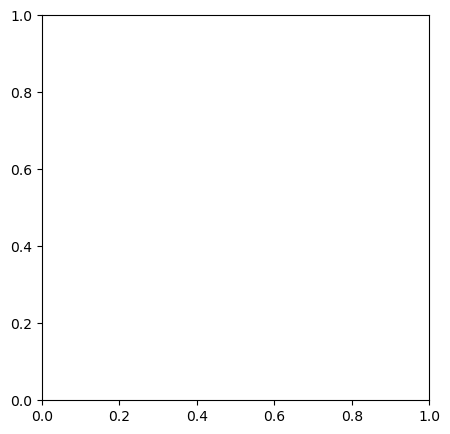

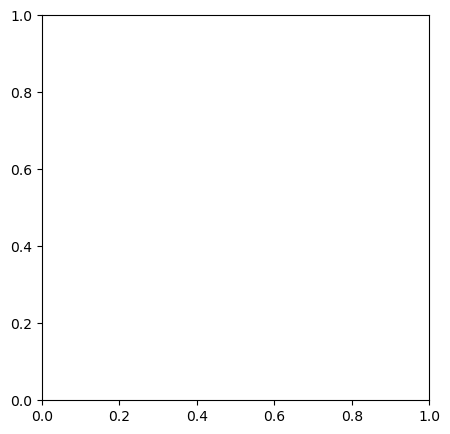

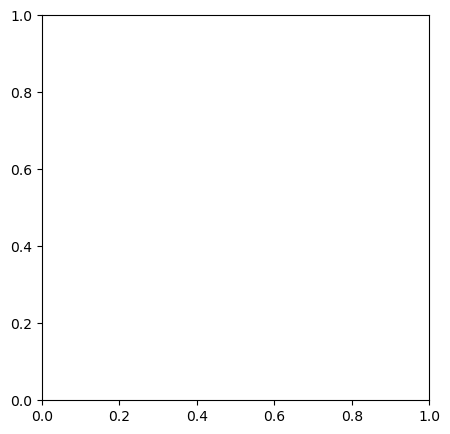

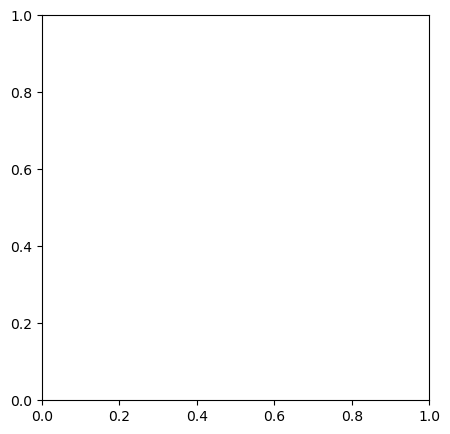

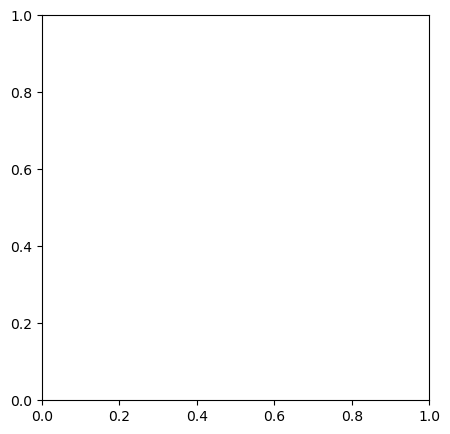

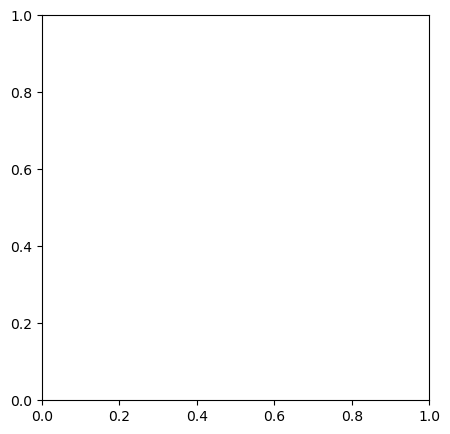

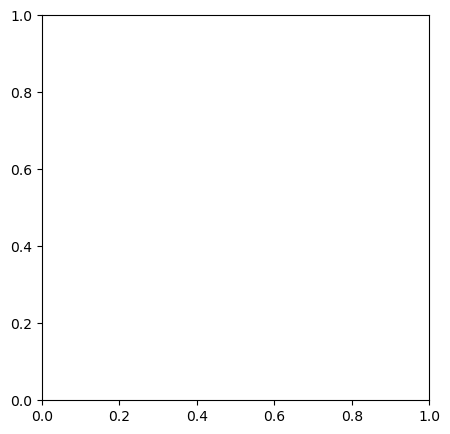

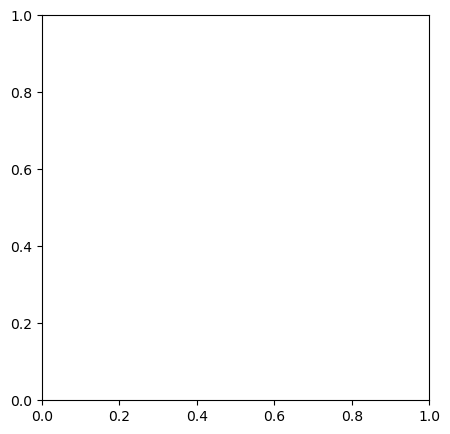

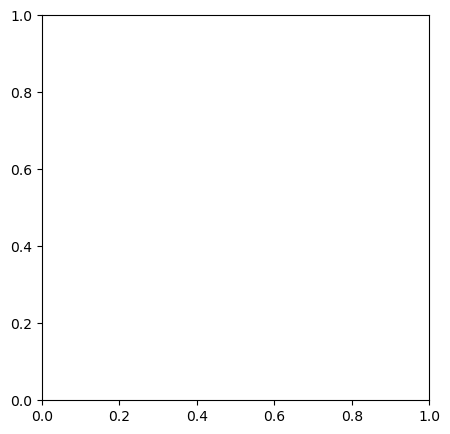

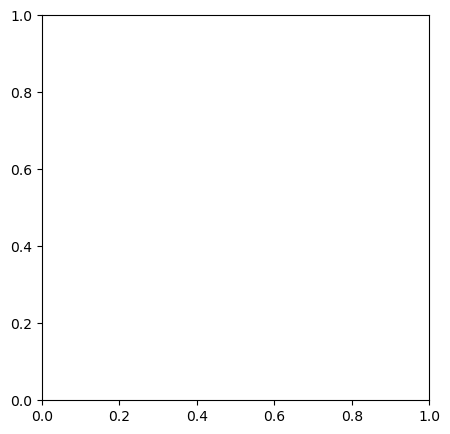

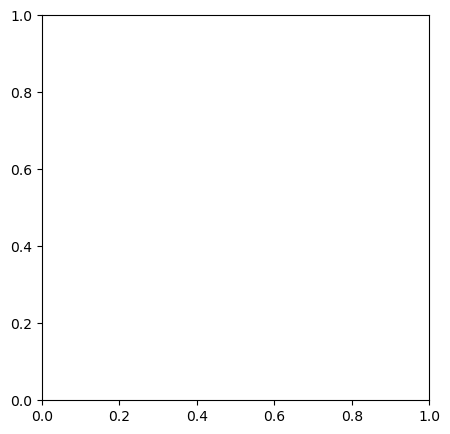

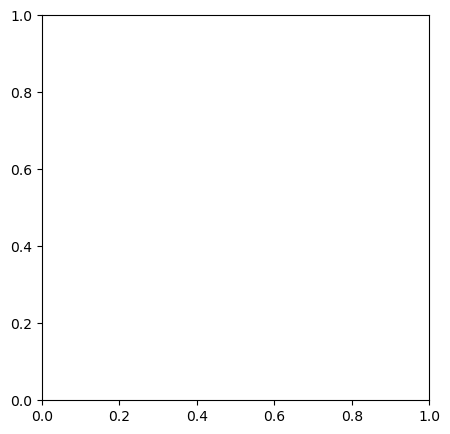

In [121]:
set = ['1_0011546_Anca_X14', '0_0011695_Anca_X36', '6_0011695_Anca_X36']

for glom in tqdm(set):

    tmp = glom.split("_")
    sample = tmp[3]
    i = tmp[0]     # glom number

    # adata_i = sc.read(adata_save_dir + f'{sample}.h5ad')


    adata_i = sc.read(adata_dir + f'{sample}.h5ad')
    he_image = plt.imread(he_image_dir + f'{sample}.tiff')
    slide_id = list(adata_i.uns['spatial'].keys())[0]
    adata_i.uns['spatial'][slide_id]['images']['he_downscaled_aligned'] = he_image  
    adata_i.uns['spatial'][slide_id]['scalefactors']['tissue_he_downscaled_aligned_scalef'] = 1

    adata_i_nichpca = adata[adata.obs['Sample_num'] == f'{sample}']
    adata_i.obs['nichepca_glom_no'] = adata_i_nichpca.obs['nichepca_glom_no']

    
    
    x, y = adata_i.obs.loc[adata_i.obs['nichepca_glom_no'] == i, ['x', 'y']].mean()

    x_min = x - 130 # window
    x_max = x + 100 # window
    y_min = y - 230 # window
    y_max = y + 200 # window

    x_min = x - window
    x_max = x + window
    y_min = y - window
    y_max = y + window
    
    for gene in genes:
        fig, ax = plt.subplots(figsize=(5, 5))
        try:
            sc.pl.spatial(adata_i[(adata_i.obs['x'] > x_min) & (adata_i.obs['x'] < x_max) & (adata_i.obs['y'] > y_min) & (adata_i.obs['y'] < y_max)],
                          library_id=adata_i.obs['Slide_ID'][0],
                          img_key='he_downscaled_aligned',
                          color=gene,
                          size=.2,
                          ax=ax,
                          show=False)
            
            plt.savefig(f"gloms_selected_with_expression_new/sample_{sample}_glom_{i}_gene_{gene}.jpg", format='jpg', bbox_inches='tight', dpi=dpi)
        except:
            print(f'gene {gene} not exist for sample {sample}')
        plt.close()

## Plot glom with gDT for a set of selected gloms

In [112]:
set = ['X3_2']
set = ['1_0011546_Anca_X14', '0_0011695_Anca_X36', '6_0011695_Anca_X36']

In [118]:
# format: set = sample_glom
dpi = 300
window = 250

for glom in tqdm(set):

    tmp = glom.split("_")
    # sample = tmp[0]
    # i = tmp[1]     # glom number

    sample = tmp[3]
    i = tmp[0]     # glom number
    
    # adata_i = sc.read(adata_save_dir + f'{sample}.h5ad')


    adata_i = sc.read(adata_dir + f'{sample}.h5ad')
    he_image = plt.imread(he_image_dir + f'{sample}.tiff')
    slide_id = list(adata_i.uns['spatial'].keys())[0]
    adata_i.uns['spatial'][slide_id]['images']['he_downscaled_aligned'] = he_image  
    adata_i.uns['spatial'][slide_id]['scalefactors']['tissue_he_downscaled_aligned_scalef'] = 1

    adata_i_nichpca = adata[adata.obs['Sample_num'] == f'{sample}']
    adata_i.obs['nichepca_glom_no'] = adata_i_nichpca.obs['nichepca_glom_no']
    adata_i.obs['celltype_subsets'] = adata_i_nichpca.obs['celltype_subsets']
    
    x, y = adata_i.obs.loc[adata_i.obs['nichepca_glom_no'] == i, ['x', 'y']].mean()

    x_min = x - 130 # window
    x_max = x + 100 # window
    y_min = y - 230 # window
    y_max = y + 200 # window

    x_min = x - window
    x_max = x + window
    y_min = y - window
    y_max = y + window

    adata_i.obs['is_gdT'] = [1 if i == 'gdT' else None for i in adata_i.obs['celltype_subsets']]

    # print(f"sample_{sample}_glom_{i} adata_i.obs['is_gdT'].sum())
    
    # try:
    fig, ax = plt.subplots(figsize=(5, 5))
    sc.pl.spatial(adata_i[(adata_i.obs['x'] > x_min) & (adata_i.obs['x'] < x_max) & (adata_i.obs['y'] > y_min) & (adata_i.obs['y'] < y_max)],
                  library_id=adata_i.obs['Slide_ID'][0],
                  img_key='he_downscaled_aligned',
                  color='is_gdT',
                  size=.2,
                  ax=ax,
                  show=False)
    
    plt.savefig(f"gloms_selected_gDT_new/sample_{sample}_glom_{i}.jpg", format='jpg', bbox_inches='tight', dpi=dpi)
    plt.close()
    # except:
        # print(f'gene {gene} not exist for sample {sample}')

100%|██████████| 3/3 [00:20<00:00,  6.81s/it]


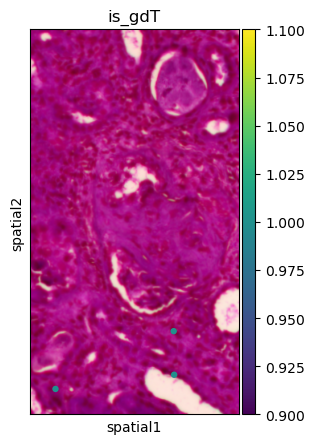

In [117]:
fig, ax = plt.subplots(figsize=(5, 5))
sc.pl.spatial(adata_i[(adata_i.obs['x'] > x_min) & (adata_i.obs['x'] < x_max) & (adata_i.obs['y'] > y_min) & (adata_i.obs['y'] < y_max)],
              library_id=adata_i.obs['Slide_ID'][0],
              img_key='he_downscaled_aligned',
              color='is_gdT',
              size=.2,
              ax=ax,
              show=True)

## Count the number of gDT cell per all gloms

In [35]:
adata = sc.read_h5ad("/projectbig/jupyternotebook/xenium_cgn/results_behnam/adata_repo/data_glom_ann_cell_type_v1.h5ad")

In [101]:
df = pd.DataFrame(columns=['sample', 'glom', 'disease', 'no_gdt', 'no_total', 'gdt_ratio'])

for sample in tqdm(sample_set):

    adata_i = adata[adata.obs['Sample_num'] == f'X{sample}']
    
    # adata_i.obs['is_gdT'] = [1 if i == 'gdT' else 0 for i in adata_i.obs['celltype_subsets']]
    # adata_i.obs['is_gdT'] = np.where(adata_i.obs['celltype_subsets'] == 'gdT', 1, 0)

    mapping = {'gdT': 1}
    adata_i.obs['is_gdT'] = adata_i.obs['celltype_subsets'].map(mapping).fillna(0).astype(int)

    disease = adata_i.obs['Disease'][0]

    # glom_key = 'nichepca_glom_no'
    glom_key = 'glom_ID'
    glom_no = adata_i.obs[glom_key].unique()
    for i in glom_no:
        if i.split("_")[0] != 'Other':
            g = adata_i.obs.loc[adata_i.obs[glom_key] == i, 'is_gdT'].sum()
            pg = adata_i.obs.loc[adata_i.obs['polygon_flags'] == i, 'is_gdT'].sum()
            no_gdt = g + pg
            no_total = len(adata_i.obs.loc[adata_i.obs[glom_key] == i, 'is_gdT'])
            df.loc[len(df)] = [sample, i, disease, no_gdt, no_total, no_gdt/no_total]

100%|██████████| 60/60 [35:42<00:00, 35.70s/it] 


In [102]:
# df.to_csv("/projectbig/jupyternotebook/xenium_cgn/gDT_all_gloms.csv")
df.to_csv("gDT_all_gloms_pregloms.csv")

In [106]:
df.loc[df['no_gdt'] > 1]

,sample,glom,disease,no_gdt,no_total,gdt_ratio
26,1,26_0011762_Cntrl_X1,Cntrl,3,124,0.024194
47,3,2_0011762_Anca_X3,Anca,2,174,0.011494
87,9,11_0011546_Cntrl_X9,Cntrl,2,139,0.014388
175,13,3_0011546_Gbm_X13,Gbm,2,640,0.003125
182,13,10_0011546_Gbm_X13,Gbm,3,89,0.033708
185,14,0_0011546_Anca_X14,Anca,2,154,0.012987
186,14,1_0011546_Anca_X14,Anca,6,654,0.009174
192,14,7_0011546_Anca_X14,Anca,2,216,0.009259
195,15,0_0011546_Sle_X15,Sle,2,321,0.006231
233,17,12_0011216_Anca_X17,Anca,2,204,0.009804


In [7]:
## Single samples, with tunable window

In [33]:
sample = 'X6'
i = '0'     # glom number

adata_i = adata[adata.obs['Sample_num'] == sample]
x, y = adata_i.obs.loc[adata_i.obs['nichepca_glom_no'] == i, ['x', 'y']].mean()

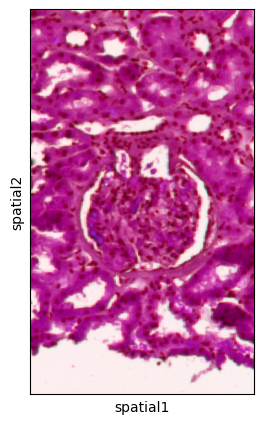

In [34]:
x_min = x - 130
x_max = x + 100
y_min = y - 230
y_max = y + 200

fig, ax = plt.subplots(figsize=(5, 5))
sc.pl.spatial(adata_i[(adata_i.obs['x'] > x_min) & (adata_i.obs['x'] < x_max) & (adata_i.obs['y'] > y_min) & (adata_i.obs['y'] < y_max)],
              library_id=adata_i.obs['Slide_ID'][0],
              img_key='he_downscaled_aligned',
              ax=ax,
              show=True)
plt.show()

gene CD8 not exist for sample X6
gene CD68 not exist for sample X6
Done!


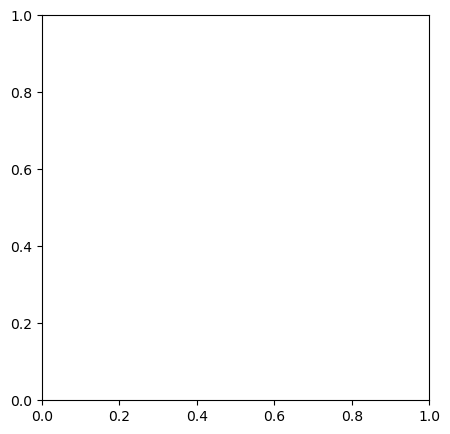

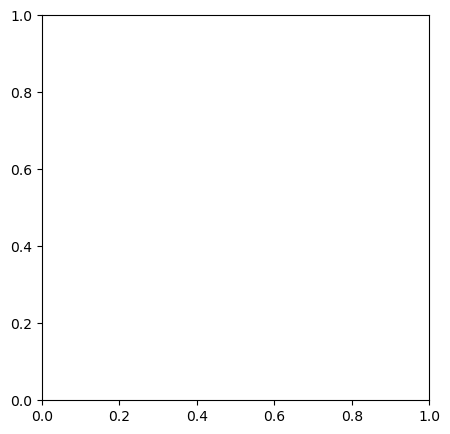

In [35]:
for gene in genes:
    try:
        fig, ax = plt.subplots(figsize=(5, 5))
        sc.pl.spatial(adata_i[(adata_i.obs['x'] > x_min) & (adata_i.obs['x'] < x_max) & (adata_i.obs['y'] > y_min) & (adata_i.obs['y'] < y_max)],
                      library_id=adata_i.obs['Slide_ID'][0],
                      img_key='he_downscaled_aligned',
                      color=gene,
                      size=.2,
                      ax=ax,
                      show=False)
        
        plt.savefig(f"gloms_selected_with_expression/SELECTED_sample_{sample}_glom_{i}_gene_{gene}.jpg", format='jpg', bbox_inches='tight', dpi=dpi)
        plt.close()
    except:
        print(f'gene {gene} not exist for sample {sample}')

print("Done!")

In [ ]:
# X2_5
x_min = x - 150
x_max = x + 100
y_min = y - 250
y_max = y + 200

# X3_1
x_min = x - 130
x_max = x + 100
y_min = y - 230
y_max = y + 200

# X3_2
x_min = x - 130
x_max = x + 100
y_min = y - 230
y_max = y + 200

# X6_0
x_min = x - 130
x_max = x + 100
y_min = y - 230
y_max = y + 200

In [9]:
adata.obs.columns

Index(['x', 'y', 'z', 'cluster', 'n_transcripts', 'density', 'elongation',
       'area', 'avg_confidence', 'avg_assignment_confidence',
       'max_cluster_frac', 'lifespan', 'x_centroid', 'y_centroid', 'cell_area',
       'annot', 'annot_n', 'ID', 'Disease', 'Slide_num', 'Sample_num',
       'Slide_ID', 'celltype_l1', 'celltype_l1_codes', 'celltype_l1_proba',
       'batch', 'nichepca_ann', 'nichepca_glom_no', 'nichepca_clusters'],
      dtype='object')

In [10]:
adata2 = sc.read_h5ad("/projectbig/jupyternotebook/xenium_cgn/robin_xenium_cgn_from_epyc/h5ad_aligned/merged_with_Disease_ImmuneCellSubtypes.h5ad")

In [13]:
adata.obs['celltype_subsets'] = adata2.obs['celltype_subsets']

In [14]:
adata.write("/projectbig/jupyternotebook/xenium_cgn/adata_repo/data_glom_ann_cell_type_v1.h5ad")

In [6]:
adata = sc.read_h5ad("/projectbig/jupyternotebook/xenium_cgn/results_behnam/adata_repo/data_glom_ann_cell_type_v1.h5ad")

In [9]:
adata.obs['Disease']

cell_CRc5a3721c5-120227_0011546     Anca
cell_CR85333614e-227363_0011284     Anca
cell_CRe9244f5f0-274454_0018775     Anca
cell_CRd921aadf4-7960_0011216        Sle
cell_CR85333614e-19040_0011284       Sle
                                   ...  
cell_CRb53fa7cc5-166196_0011762     Anca
cell_CRb53fa7cc5-152995_0011762     Anca
cell_CRb53fa7cc5-208012_0011762    Cntrl
cell_CRb53fa7cc5-211260_0011762    Cntrl
cell_CRb53fa7cc5-22467_0011762      Anca
Name: Disease, Length: 2899179, dtype: category
Categories (4, object): ['Anca', 'Cntrl', 'Gbm', 'Sle']